In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [82]:
X, y = make_blobs(n_samples = 2000, n_features = 2, centers = 3, cluster_std = 1, random_state = 0)
X = pd.DataFrame(X, columns = ['x1', 'x2'])
y = pd.DataFrame(y, columns = ['target'])

data = pd.concat([X, y], axis = 1)
data.to_csv('data.csv', index = False)

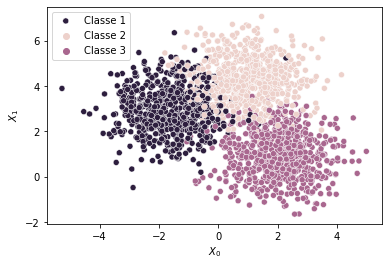

In [86]:
sns.scatterplot(x = 'x1', y = 'x2', data = data, hue = 'target')
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.legend([f'Classe {x}' for x in range(1, y.nunique()[0] + 1)])

plt.savefig('images/plotq1a')
plt.show()

In [74]:
y_cat = to_categorical(y)

In [75]:
X_new, X_test, y_new, y_test =  train_test_split(X, y_cat, test_size = 0.2, random_state = 0)

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X_new, y_new, test_size = 0.25, random_state = 0)

In [164]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Valor da função erro')
    plt.ylabel('Função erro')
    plt.xlabel('Épocas')
    plt.legend(['Treino', 'Validação'], loc='best')
    plt.savefig('images/plotq1b')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Acurácia do modelo')
    plt.ylabel('Acurácia')
    plt.xlabel('Épocas')
    plt.legend(['Treino', 'Validação'], loc='best')
    plt.savefig('images/plotq1c')
    plt.show()

In [78]:
def define_model(neurons):
    
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation = 'relu', input_dim = X_train.shape[1]))
    model.add(layers.Dense(neurons, activation = 'relu'))
    model.add(layers.Dense(y_cat.shape[1], activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    
    return model

In [ ]:
history_dict = {}

for neurons in [2, 5, 10, 15, 20]:
    model = define_model(neurons)
    es = EarlyStopping(patience = 30, restore_best_weights = True)
    
    print(neurons)
    history_dict[neurons] = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 300, verbose = .1, callbacks = [es])
    history_dict[f'model_{neurons}'] = model

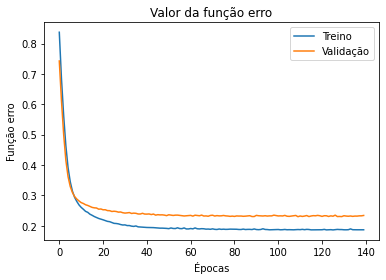

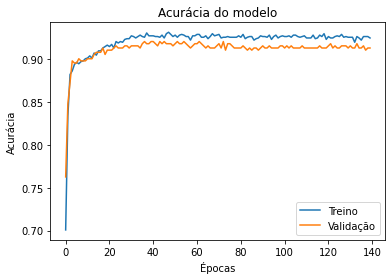

In [165]:
plot_loss_accuracy(history_dict[10])

In [144]:
y_pred = np.argmax(history_dict['model_10'].predict(X_test), axis = -1)
y_ori = np.argmax(y_test, axis = -1)
confusion_matrix(y_ori, y_pred)

array([[131,   2,   7],
       [  2, 121,   0],
       [  8,   1, 128]])

In [145]:
history_dict['model_10'].evaluate(X_test, y_test)[1]

13/13 [==============================] - 0s 4ms/step - loss: 0.1498 - accuracy: 0.9500


0.949999988079071

Questão 02

In [15]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    """Plot the 2D-decision region of a classifier with matplotlib along its first two dimensions X[:,0] and X[:,1].

    Args:
        X (np.Array): (n,p) dataset to classify
        y (np.Array): (n,) array of labels. Works well up to 5 unique labels.
        classifier (sklearn): fitted sklearn classifier.
        test_idx (int, optional):  Index of test datapoints within X to display with a larger mark style. Defaults to None.
        resolution (float, optional): Resolution of the meshgrid used to colorize regions. Defaults to 0.02.
    """

    # setup marker generator and color map up for up to 5 classes
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker='x', label=cl)

    # Plot test samples if they exist
    if not test_idx is None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        for idx, cl in enumerate(np.unique(y_test)):
            plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1],
                        alpha=1, color=cmap(idx),
                        linewidths=1, marker='o', s=55, label=f'test {cl}')
    plt.legend()

In [1]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC

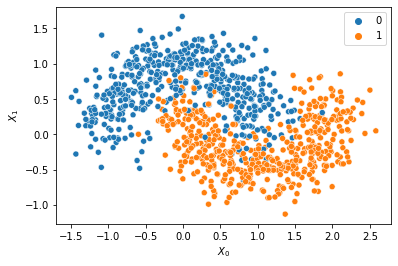

In [146]:
X_train, y_train = make_moons(n_samples = 1000, noise = 0.25, random_state = 0)
X_test, y_test = make_moons(n_samples = 400, noise = 0.2, random_state = 0)

sns.scatterplot(x = X_train[:, 0], y = X_train[:, 1], hue = y_train)
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')

plt.legend()
plt.savefig('images/plotq3a')
plt.show()

In [156]:
c_list = [0.01, 0.1, 1, 10, 100, 1000]
d_list = [2, 3, 4, 5, 6, 7]
acc_list = []
svms = {}
idx = 0

for C in c_list:
    for d in d_list:
        svm = SVC(kernel = 'poly', C = C, degree = d)
        svm.fit(X_train, y_train)
        
        svms[idx] = svm
        idx += 1
        acc_list.append(((svm.predict(X_test) == y_test).sum() / y_test.shape[0]))

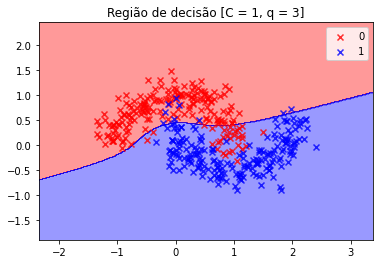

In [177]:
plot_decision_regions(X_test, y_test, classifier = svms[np.argmax(acc_list)])
plt.title('Região de decisão [C = 1, q = 3]')
plt.savefig('images/plotq3b')

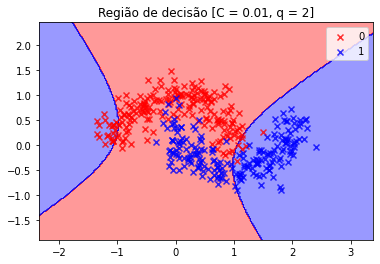

In [178]:
plot_decision_regions(X_test, y_test, classifier = svms[np.argmin(acc_list)])
plt.title('Região de decisão [C = 0.01, q = 2]')
plt.savefig('images/plotq3c')

In [167]:
c_list = [0.01, 0.1, 1, 10, 100, 1000]
l_list = [0.01, 0.1, 1, 2, 3, 4]
rbf_acc_list = []
rbfs = {}
idx = 0

for C in c_list:
    for l in l_list:
        svm = SVC(kernel = 'rbf', C = C, gamma = l)
        svm.fit(X_train, y_train)
        
        rbfs[idx] = svm
        idx += 1
        rbf_acc_list.append(((svm.predict(X_test) == y_test).sum() / y_test.shape[0]))

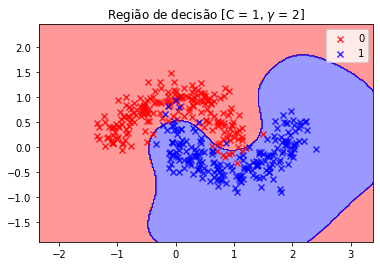

In [179]:
plot_decision_regions(X_test, y_test, classifier = rbfs[np.argmax(rbf_acc_list)])
plt.title('Região de decisão [C = 1, $\gamma$ = 2]')
plt.savefig('images/plotq3d')

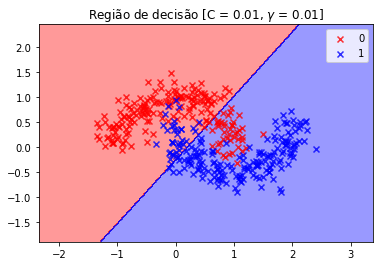

In [180]:
plot_decision_regions(X_test, y_test, classifier = rbfs[np.argmin(rbf_acc_list)])
plt.title('Região de decisão [C = 0.01, $\gamma$ = 0.01]')
plt.savefig('images/plotq3e')